In [ ]:
""" Author : Aditya Kanakamalla """

' Author : Aditya Kanakamalla '

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from google.colab import files
import pandas as pd

In [ ]:
uploaded = files.upload()
# data = pd.read_csv()
# data.head()


Saving mtcars.csv to mtcars.csv


In [ ]:
# print(uploaded)
df=pd.read_csv("/content/mtcars.csv")

In [ ]:
df.head()

,manufacturer,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.tail()

,manufacturer,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  32 non-null     object 
 1   mpg           32 non-null     float64
 2   cyl           32 non-null     int64  
 3   disp          32 non-null     float64
 4   hp            32 non-null     int64  
 5   drat          32 non-null     float64
 6   wt            32 non-null     float64
 7   qsec          32 non-null     float64
 8   vs            32 non-null     int64  
 9   am            32 non-null     int64  
 10  gear          32 non-null     int64  
 11  carb          32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [ ]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [ ]:
df["am"].unique()

array([1, 0])

In [ ]:
x_test= df["am"].value_counts()
x_test

0    19
1    13
Name: am, dtype: int64

In [ ]:
df.groupby('gear').am.value_counts()

gear  am
3     0     15
4     1      8
      0      4
5     1      5
Name: am, dtype: int64

In [ ]:
ls= ['A',1]

In [ ]:
print(type(ls))

<class 'list'>


In [ ]:
ls1= [1,2,3]

In [ ]:
print(type(ls1))

<class 'list'>


#Bar Plot

<Figure size 1000x700 with 0 Axes>

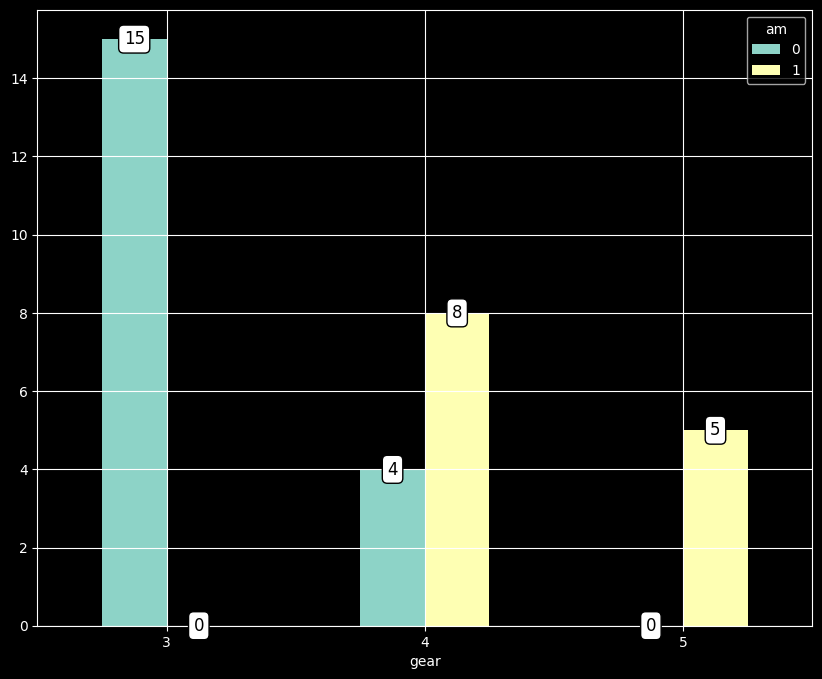

In [ ]:
plt.figure(figsize=(10,7), facecolor='yellow')
with plt.style.context('dark_background'):
   ax = pd.crosstab(df.gear,df.am).plot(kind="bar", figsize=(10,8))
plt.xticks(rotation=0)
for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2 ,p.get_height(),
                "%.f" % p.get_height(),
                color='black', rotation="horizontal", fontsize=12, horizontalalignment="center", verticalalignment="center",
                bbox=dict(boxstyle="Round", fc="w"))
plt.grid()
plt.show()

In [ ]:
df["manufacturer"].unique

<bound method Series.unique of 0               Mazda RX4
1           Mazda RX4 Wag
2              Datsun 710
3          Hornet 4 Drive
4       Hornet Sportabout
5                 Valiant
6              Duster 360
7               Merc 240D
8                Merc 230
9                Merc 280
10              Merc 280C
11             Merc 450SE
12             Merc 450SL
13            Merc 450SLC
14     Cadillac Fleetwood
15    Lincoln Continental
16      Chrysler Imperial
17               Fiat 128
18            Honda Civic
19         Toyota Corolla
20          Toyota Corona
21       Dodge Challenger
22            AMC Javelin
23             Camaro Z28
24       Pontiac Firebird
25              Fiat X1-9
26          Porsche 914-2
27           Lotus Europa
28         Ford Pantera L
29           Ferrari Dino
30          Maserati Bora
31             Volvo 142E
Name: manufacturer, dtype: object>

Histogram

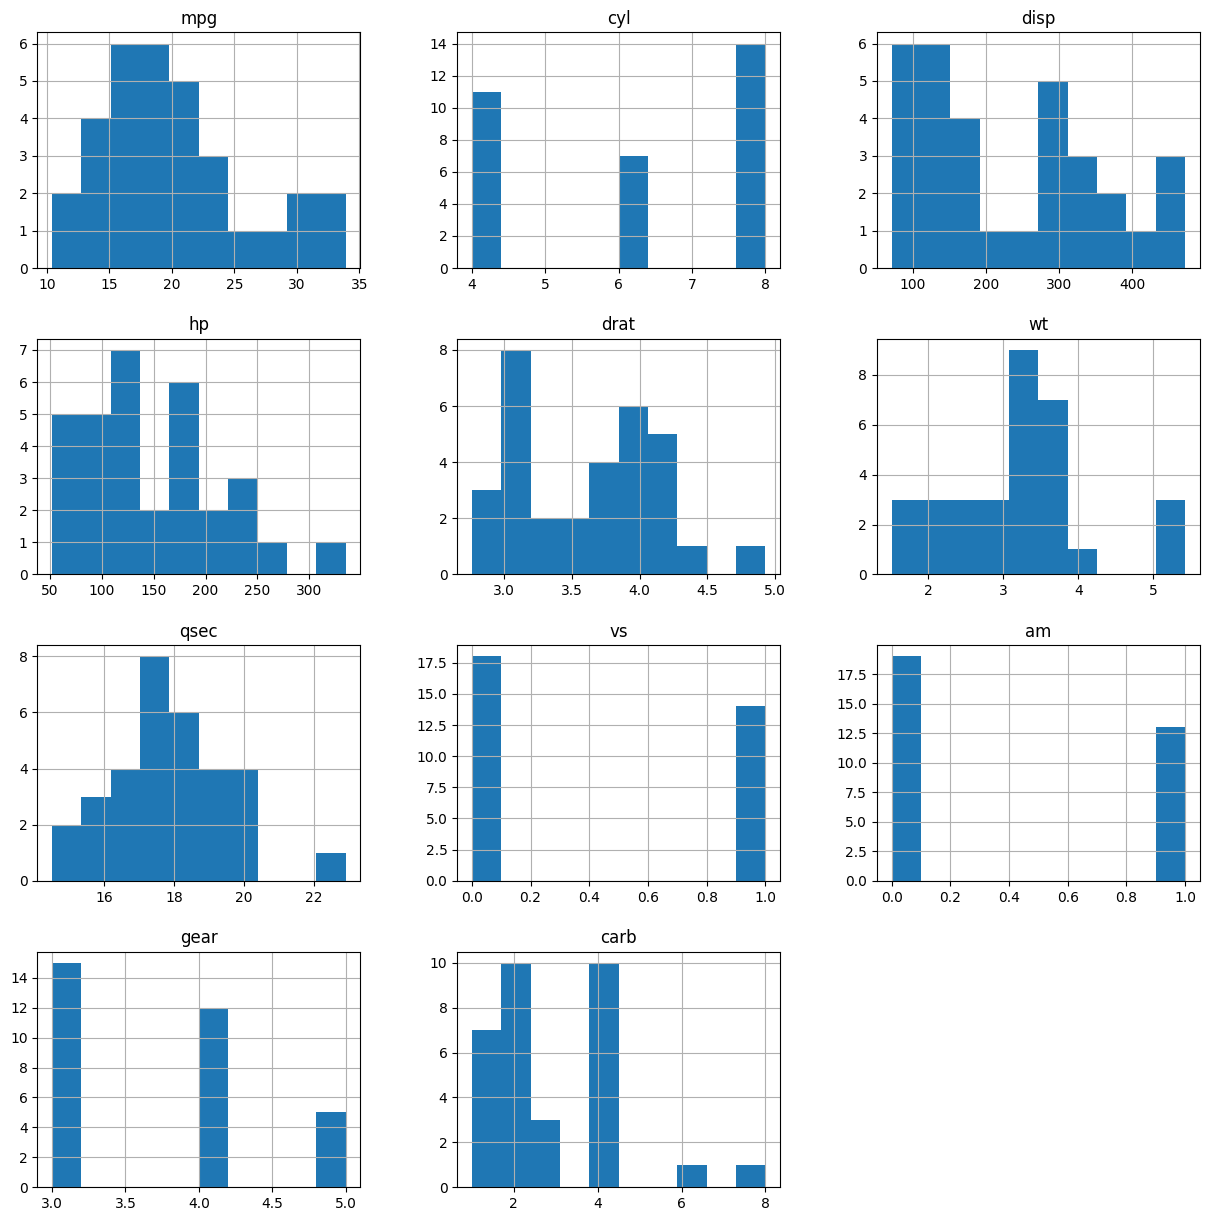

In [ ]:
df.hist(figsize=(15,15))
plt.show()

In [ ]:
Correlation = df.corr()
Correlation.style.background_gradient()

<ipython-input-25-2018d25bd3b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation = df.corr()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


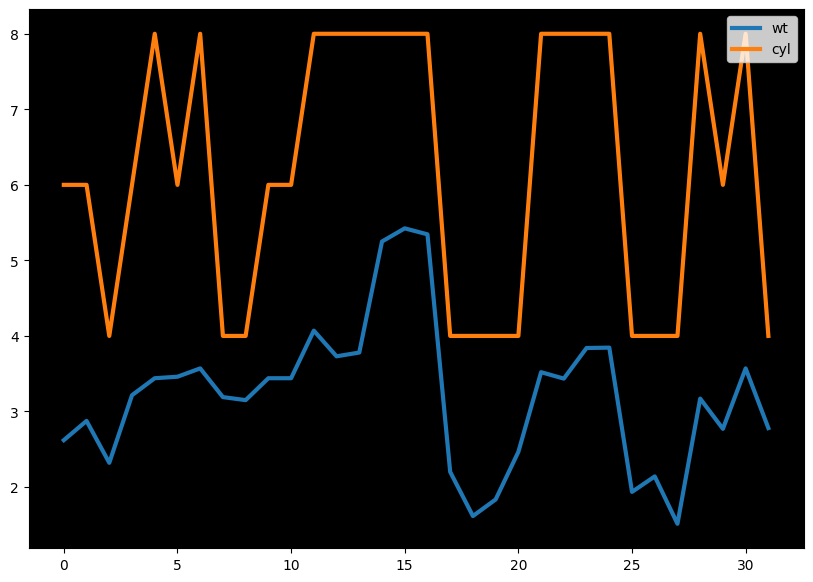

In [ ]:
plt.figure(figsize=(10,7) )
plt.axes(facecolor='black')
plt.plot(df["wt"], label = "wt" , linewidth =3)
plt.plot(df["cyl"], label = "cyl" , linewidth =3)
plt.legend(loc='upper right')
plt.show()